In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

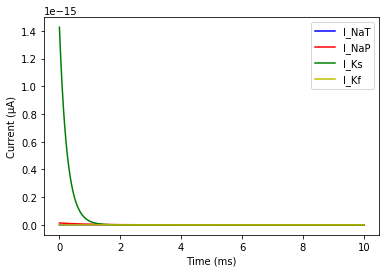

In [3]:
# Plot additional currents
start = 0
stop = 10
V_m = np.arange(start, stop, 0.001)
t = np.arange(start, stop, 0.001)
    
# Define nernst reversal potentials
e_Na = 48 # (mV) nernst reversal potential of sodium current
e_K = -90 # (mV) nernst reversal potential of potassium current (-80 in Gunay)

# Define maximal channel conductances
gbar_Na = 120 # (µS/cm^2) maximum sodium channel conductance 
gbar_K = 36 # (µS/cm^2) maximum potassium channel conductance 

# Define voltage-dependent steady state
x_Inf_NaT_A =  1/(1 + np.exp(V_m + 29.13)/-8.92)
x_Inf_NaT_I = 1/(1 + np.exp(V_m + 47)/5)
x_Inf_NaP = 1/(1 + np.exp(V_m + 48.77)/-3.68)
x_Inf_Ks = 1/(1 + np.exp(V_m + 12.85)/-19.91)
x_Inf_Kf_A = 1/(1 + np.exp(V_m + 17.55)/-7.27)
x_Inf_Kf_I = 1/(1 + np.exp(V_m + 45)/6)

# Define time constants
tau_NaT_A = 0.13 + (3.43/(1 + ((V_m + 45.35)/5.98)**3))
tau_NaT_I = 0.36 + (((V_m + 20.65)/10.47)**3)
tau_NaP = 1
tau_Ks = 2.03 + (1.96/(1 + ((V_m - 29.83)/3.32)**4))
tau_Kf_A = 1.94 + 2.66/(1 + ((V_m - 8.12)/7.96)**4)
tau_Kf_I = 1.79 + 515.8/(1 + ((V_m + 174.4)/28.66)**4)

# Define mechanism for m and h equations
dxdt_NaT_A = (x_Inf_NaT_A)/tau_NaT_A
dxdt_NaT_I = (x_Inf_NaT_I)/tau_NaT_I
dxdt_NaP = (x_Inf_NaP)/tau_NaP
dxdt_Ks = (x_Inf_Ks)/tau_Ks
dxdt_Kf_A = (x_Inf_Kf_A)/tau_Kf_A
dxdt_Kf_I = (x_Inf_Kf_I)/tau_Kf_I

# Define channel currents
I_NaT = gbar_Na * (dxdt_NaT_A**3) * dxdt_NaT_I * (V_m - e_Na)
I_NaP = gbar_Na * (dxdt_NaP**1) * (V_m - e_Na)
I_Ks = gbar_K * (dxdt_Ks**4) * (V_m - e_K)
I_Kf = gbar_K * (dxdt_Kf_A**4) * dxdt_Kf_I * (V_m - e_K)

plt.plot(t, I_NaT, 'b', label = 'I_NaT')
plt.plot(t, I_NaP, 'r', label = 'I_NaP')
plt.plot(t, I_Ks, 'g', label = 'I_Ks')
plt.plot(t, I_Kf, 'y', label = 'I_Kf')

pyplot.xlabel('Time (ms)')
pyplot.ylabel('Current (μA)')

plt.legend()
plt.show()